In [1]:
import torch
from torch import nn


device = 'cuda'

In [2]:
class tinyVGG(nn.Module):
    def __init__(self, in_shape, hidden_units, out_shape):
        super().__init__()
        self.first_conv = nn.Sequential(
            nn.Conv2d(in_channels=in_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1),
            nn.ReLU()
        )
        self.second_conv = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.third_conv = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=13 * 13 * hidden_units, 
                      out_features=out_shape)
        )

    def forward(self, x):
        return self.classifier((self.third_conv(self.second_conv(self.first_conv(x)))))

In [3]:
from pathlib import Path

model_path = Path('models/79acc.pth')

model = tinyVGG(3, 10, 1).to(device)
model.load_state_dict(torch.load(model_path)) 

<All keys matched successfully>

tensor([[0.9119]], device='cuda:0')
Predicted class is Dog
tensor([[0.1407]], device='cuda:0')
Predicted class is Cat
tensor([[0.3227]], device='cuda:0')
Predicted class is Cat


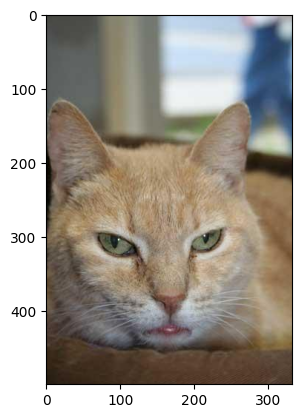

In [4]:
from torchvision import transforms
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

classes = ['Cat', 'Dog']

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

image_path = Path("static/0.jpg")

with Image.open(image_path) as image:
    image_transformed = data_transform(image).to("cpu")
    print(image_transformed)




# def predict_image(model, image_path):
#     with Image.open(image_path) as image:
#         image_transformed = data_transform(image).to(device)
#         model.eval()
#         with torch.inference_mode():
#             predicted_logits = model(image_transformed.unsqueeze(dim=0))
#             print(torch.sigmoid(predicted_logits))
#             predicted_class = classes[int(torch.round(torch.sigmoid(predicted_logits)).item())]
#             print(f'Predicted class is {predicted_class}')
#             plt.imshow(transforms.ToTensor()(image).permute(1, 2, 0))

# dog_path = Path('images_to_predict/dog.jpg')
# cat_path = Path('images_to_predict/cat.jpg')
    
# predict_image(model, cat_path)
# predict_image(model, dog_path)
# predict_image(model,  Path('data/cat/41.jpg'))





